<a href="https://colab.research.google.com/github/codephrem/Todo-List/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Labraries

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [91]:
data = pd.read_csv("Play_Tennis.csv")

data discription

In [ ]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Cool,Normal,Weak,No
1,Rain,Cool,High,Weak,No
2,Rain,Mild,High,Strong,Yes
3,Overcast,Mild,High,Strong,No
4,Overcast,Cool,High,Weak,Yes


In [ ]:
data.tail()

,Outlook,Temperature,Humidity,Wind,Play
995,Overcast,Mild,Normal,Weak,No
996,Rain,Mild,Normal,Weak,Yes
997,Overcast,Hot,Normal,Weak,No
998,Rain,Mild,Normal,Weak,No
999,Overcast,Hot,High,Weak,Yes


In [ ]:
data.isnull().sum()

,0
Outlook,0
Temperature,0
Humidity,0
Wind,0
Play,0


In [ ]:
data.shape

(1000, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      1000 non-null   object
 1   Temperature  1000 non-null   object
 2   Humidity     1000 non-null   object
 3   Wind         1000 non-null   object
 4   Play         1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


Split Features and Target

In [ ]:
X = data.drop("Play", axis=1)
y = data["Play"]

Encode the Target Column

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Encode the Categorical Features

In [ ]:
categorical_cols = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("encode", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

Split Training & Testing Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Build the Naive Bayes Model Pipeline

In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", MultinomialNB())
    ]
)

Train the Model

In [ ]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Outlook', 'Temperature',
                                                   'Humidity', 'Wind'])])),
                ('classifier', MultinomialNB())])

predictions

In [ ]:
y_pred = model.predict(X_test)

Model Evaluation

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", round(acc, 2))
print("Precision:", round(prec,2))
print("Recall:", round(rec,2))
print("F1 Score:", round(f1,2))

Accuracy: 0.5
Precision: 0.6
Recall: 0.29
F1 Score: 0.39


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[68 21]
 [79 32]]


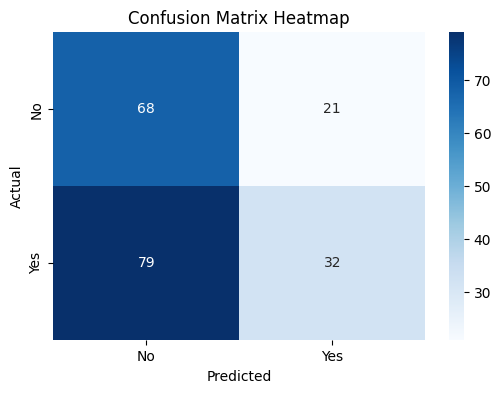

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

classification report from the  model

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.76      0.58        89
           1       0.60      0.29      0.39       111

    accuracy                           0.50       200
   macro avg       0.53      0.53      0.48       200
weighted avg       0.54      0.50      0.47       200



The Roc Curve

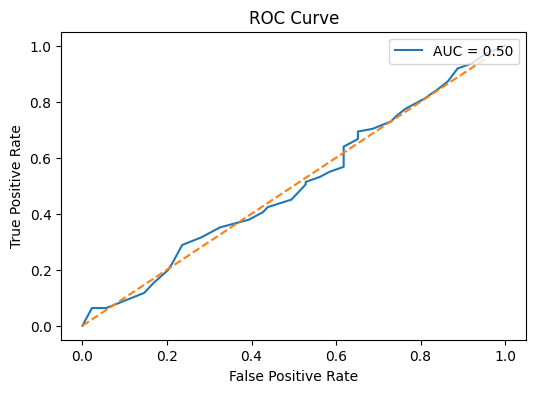

ROC AUC Score: 0.5


In [ ]:
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Convert Yes/No to 0/1
y_pred_prob = model.predict_proba(X_test)[:,1]  # Probability of "Yes"
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = roc_auc_score(y_test_bin, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper right')
plt.show()
print("ROC AUC Score:", round(roc_auc,2))

Cross-validation accurac

In [ ]:
# Compute 5-fold cross-validation accuracy on the whole pipeline
# This gives a more reliable estimate of expected performance.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Accuracy (already built-in)
cv_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Cross-validation Accuracy (5-fold):', cv_accuracy)
print('Mean CV Accuracy: {:.4f}'.format(cv_accuracy.mean()))

# Precision
precision_scorer = make_scorer(precision_score, pos_label=1)
cv_precision = cross_val_score(model, X, y, cv=5, scoring=precision_scorer)
print('Cross-validation Precision (5-fold):', cv_precision)
print('Mean CV Precision: {:.4f}'.format(cv_precision.mean()))

# Recall
recall_scorer = make_scorer(recall_score, pos_label=1)
cv_recall = cross_val_score(model, X, y, cv=5, scoring=recall_scorer)
print('Cross-validation Recall (5-fold):', cv_recall)
print('Mean CV Recall: {:.4f}'.format(cv_recall.mean()))

# F1-score
f1_scorer = make_scorer(f1_score, pos_label=1)
cv_f1 = cross_val_score(model, X, y, cv=5, scoring=f1_scorer)
print('Cross-validation F1-score (5-fold):', cv_f1)
print('Mean CV F1-score: {:.4f}'.format(cv_f1.mean()))

Cross-validation Accuracy (5-fold): [0.48  0.5   0.495 0.47  0.54 ]
Mean CV Accuracy: 0.4970
Cross-validation Precision (5-fold): [0.43548387 0.48101266 0.47560976 0.44705882 0.53333333]
Mean CV Precision: 0.4745
Cross-validation Recall (5-fold): [0.28125    0.39175258 0.40206186 0.39175258 0.41237113]
Mean CV Recall: 0.3758
Cross-validation F1-score (5-fold): [0.34177215 0.43181818 0.43575419 0.41758242 0.46511628]
Mean CV F1-score: 0.4184


Predict for a Single New Observation

In [ ]:
new_data = pd.DataFrame({
    "Outlook": ["Rainy"],
    "Temperature": ["Hot"],
    "Humidity": ["High"],
    "Wind": ["Strong"]
})
# Predict
single_pred = model.predict(new_data)
print("Prediction for New Data:", single_pred[0])

Prediction for New Data: 0


In [ ]:
proba = model.predict_proba(new_data)
print("Prediction Probabilities:", proba)

Prediction Probabilities: [[0.54998688 0.45001312]]


In [ ]:
new_data2 = pd.DataFrame({
    "Outlook": ["Overcast"],
    "Temperature": ["Cool"],
    "Humidity": ["Normal"],
    "Wind": ["Strong"]
})
pred2 = model.predict(new_data2)
print("\nPrediction for New Data 2:", pred2[0])

proba2 = model.predict_proba(new_data2)
print("Prediction Probabilities 2:", proba2)


Prediction for New Data 2: 0
Prediction Probabilities 2: [[0.5109402 0.4890598]]


save the model

In [ ]:
import joblib
joblib.dump(model, "decision_tree_playtennis.pkl")

['decision_tree_playtennis.pkl']